Огородников Николай Александрович, группа 191-321

# Task 4.

### Цель работы:

1. Научиться моделировать такие временные ряды с помощью нейросетевых моделей, как AR, AR(X).
2. Найти достаточное количество скрытых слоев и количество нейронов в сети для обучения в задачах аппроксимации математических функций.
3. Произвести оценку полученных результатов на тестовой выборке.

### Задание 1.
Реализовать и протестировать AR-модель на функции $\sin\left(\[\frac{x}{2}\]\right)$.

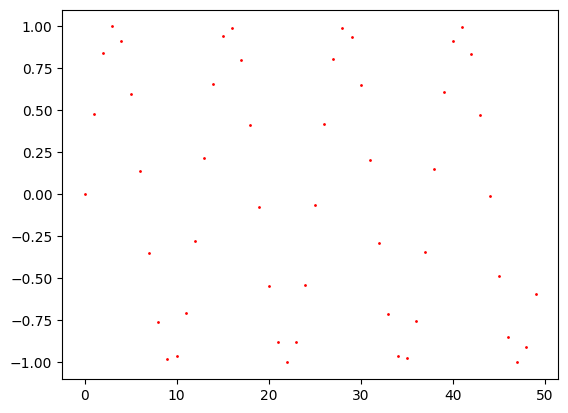

In [29]:
import math
import matplotlib.pyplot as plt
import numpy as np

# создание обучающей выборки
x_data = np.arange(0, 50, 1)
y_data = [math.sin(a / 2) for a in x_data]

# вывод точек обучающей выборки
plt.scatter(x_data, y_data, s=1, c='r')
plt.show()

In [ ]:
import tensorflow as tf


@tf.function
def MSE(ytrue, ypred):
    loss = tf.reduce_mean(tf.square(ypred - ytrue))
    return loss


class ARMODEL(tf.keras.Model):
    def __init__(self, shape):
        super(ARMODEL, self).__init__(name='')

        in_shape = shape[0]
        out_shape = shape[1]

        w_init = tf.random.normal(shape, mean=0, stddev=0.01, dtype='float32')
        self.w = tf.Variable(w_init, name='ar_w')

    def call(self, input_X, training=False):
        return tf.matmul(input_X, self.w) + tf.reduce_sum(self.w, axis=0)


def create_model():
    layer_size = 30

    input_0 = tf.keras.Input(shape=X.shape[1])

    output_0 = ARMODEL((X.shape[1], layer_size))(input_0)

    output_1 = ARMODEL((layer_size, y.shape[1]))(output_0)

    model = tf.keras.Model(input_0, output_1)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=MSE,
                  metrics=['mse'])
    return model


/home/kolus/code/machine_learning/venv/lib64/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


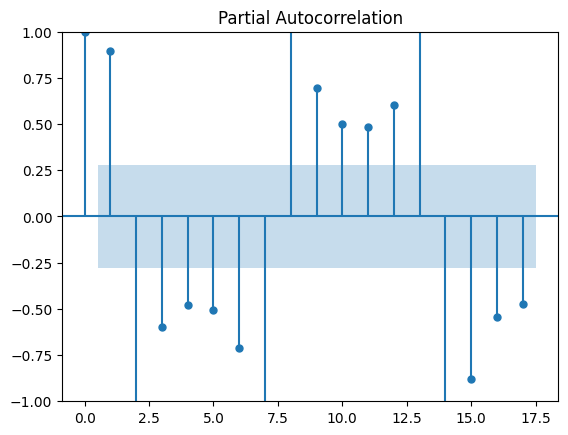

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf

# строим PACF график
# частичная автокорреляция (Partial Autocorrelation) — это краткая характеристика взаимосвязи между наблюдением во временном ряду и наблюдениями на предыдущем отрезке времени, когда влияние малой задержки устранено
# автокорреляция состоит как из прямой, так и из косвенной корреляции. И именно последние пытается удалить функция частичной автокорреляции. Оттуда и название – "частичная"
pacf = plot_pacf(np.array(y_data))

In [31]:
from statsmodels.tsa.ar_model import AutoReg

# тренировка AR-модели
ar_model = AutoReg(np.array(y_data), lags=10).fit()

# результат тренировки
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   50
Model:                    AutoReg(10)   Log Likelihood                1266.345
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Thu, 24 Nov 2022   AIC                          -2508.690
Time:                        09:21:05   BIC                          -2488.423
Sample:                            10   HQIC                         -2501.362
                                   50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.294e-15   6.05e-16     -7.095      0.000   -5.48e-15   -3.11e-15
y.L1           0.1947   1.71e-16   1.14e+15      0.000       0.195       0.195
y.L2           0.1038   1.43e-16   7.27e+14      0.0

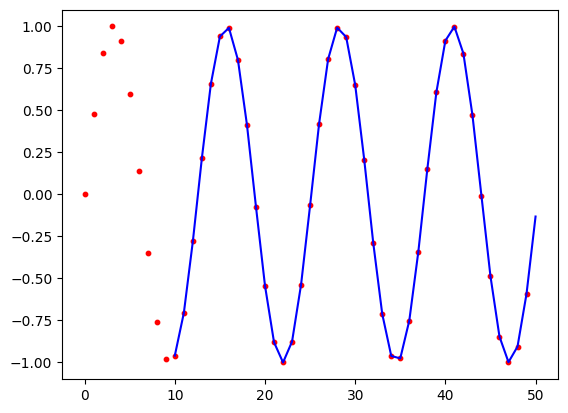

In [32]:
# предсказание и сравнение с входным графиком
pred = ar_model.predict(start=0, end=50, dynamic=False)

plt.plot(pred, color='b')
plt.scatter(x_data, y_data, s=10, c='r')
plt.show()

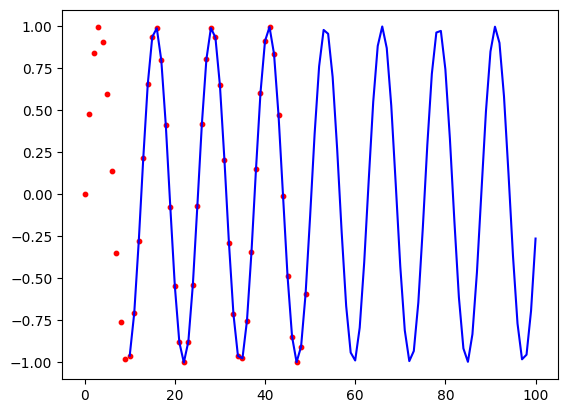

In [33]:
# предсказание с продолжением графика
pred = ar_model.predict(start=0, end=100, dynamic=False)

plt.plot(pred, color='b')
plt.scatter(x_data, y_data, s=10, c='r')
plt.show()


### Вывод

В рамках задания был реализован временной ряд нейросетевой модели как AR.

В ходе решения были сформированы входные данные для функции $\sin\left(\[\frac{x}{2}\]\right)$ на промежутке от 0 до 50 с шагом в 1. Далее с помощью библиотеки statsmodels была реализована и обучена AR модель. Затем в качестве проверки на графике были выведены графики с предсказанием исходной функции на фоне входных данных.